<a href="https://colab.research.google.com/github/sulchan/Data201/blob/master/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 1
### Introduction
### US Health Insurance
Project Members: Gbaike Ajayi, Sheyla Daccarett, Priti Rayamajhi, Sulchan Yoon

# **Dataset Features: **
 The insurance dataset captures demographic information for several individuals, including children. Specific variables include:


*   Age: The lenght of time that a person has lived
  
*   Sex: Refers to a set of biological attributes in humans

*   BMI:  Body mass index. It is a measure of body fat based on height and weight that applies to a human. (weight in kg/(height in m)2)

*   Age: The lenght of time that a person has lived
*   Sex: Refers to a set of biological attributes in humans
*   BMI:  Body mass index. It is a measure of body fat based on height and weight that applies to a human
*   Children 
*   Smoker: refers to smoker and non-smoker
*   Region: Broken into 4 sectors, Northeast, Northwest, Southeast, Southwest
*   Charges: Medical cost that has been billed by the insurance















In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
import scipy.interpolate as interp
from scipy.stats import mannwhitneyu

# **EDA**

Is the insurance rate higher for smokers?**

Is the insurance rate higher for the Northeast?**

Is there a statistically significant difference in the mean insurance payments between the beneficiaries in the  southeast and southwest?

### Initial Data load

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/sulchan/Data201/master/insurance.csv")
seedValue = 123
np.random.seed(seedValue)

In [4]:
# Data Type
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
# See the shape of the dataset
print(df.shape)
df.describe(include = "all")

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [6]:
# the first and 15 rows of the data
df.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [7]:
df.tail(15)

,age,sex,bmi,children,smoker,region,charges
1323,42,female,40.370,2,yes,southeast,43896.37630
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1326,42,female,32.870,0,no,northeast,7050.02130
1327,51,male,30.030,1,no,southeast,9377.90470
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500


In [8]:
# Checking which rows have missing data and how much data is missing
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# Checking duplicated rows
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [10]:
# Checking a specific colunm
df["region"]

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

# **Simple Descriptive Statistics**

In [11]:
# Shows the maximum value of all columns
df.max(skipna = True, numeric_only = True)

age            64.00000
bmi            53.13000
children        5.00000
charges     63770.42801
dtype: float64

This code shows the maximum values such as the greatest age is 64. 
The highest amount of children is 5. 
The max BMI is 53.13.
The highest charge is 63770.43.


In [12]:
# Shows the average value of all columns
df.mean(skipna = True, numeric_only = True)

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [13]:
# Shows the minimum value of all columns
df.min(skipna = True, numeric_only = True)

age           18.0000
bmi           15.9600
children       0.0000
charges     1121.8739
dtype: float64

In [14]:
# Shows the mode of all numeric columns
df.mode(numeric_only = True)

,age,bmi,children,charges
0,18,32.3,0,1639.5631


In [15]:
# Calculate statistics on Charges
# Calculate the range of values in Charges column
charges_range = df["charges"].max() - df["charges"].min()

# Calculate the standard deviation of values in charges column
df["charges"].std()

# Determine the quartile of charges columun
q1= df['charges'].quantile(.25) 
q2 = df["charges"].quantile(.50)
q3 = df["charges"].quantile(.75)

# Calculate the IQR
iqr = q3-q1
# Determine outlier fences 
top = q3 + (iqr * 1.5)
bottom = q1 - (iqr * 1.5)

# Determine the index locations for rows that fall outside of outlier fences
iqr_outliers = df.loc[(df['charges'] > top) | (df['charges'] < bottom)].index

print("Mean charges worked by all employees: ${:,.2f}".format(round(df["charges"].mean())))
print("The range of the charges are: ${:,.2f}".format(round(charges_range,2)))
print("Compare the range to the IQR, the IQR is: ${:,.2f}".format(round(iqr,2)))
print("The lower and upper limits of charges is ${:,.2f} and ${:,.2f}".format(round(bottom,2),round(top,2)))
print("Our lower limit is a negative amount which shows no concerns of anyone breaking the lower limits.")


Mean charges worked by all employees: $13,270.00
The range of the charges are: $62,648.55
Compare the range to the IQR, the IQR is: $11,899.63
The lower and upper limits of charges is $-13,109.15 and $34,489.35
Our lower limit is a negative amount which shows no concerns of anyone breaking the lower limits.


In [17]:
# Review of Gender
male = df["sex"].value_counts()['male']
female = df["sex"].value_counts()['female']

print("Within our dataset, we have {} males and {} females.".format(male, female))
print("To normalize, males take up {:,.2f}% and females take up {:,.2f}% percent\
 of the whole.".format(100*male/df["sex"].count(),100*female/df["sex"].count()))

Within our dataset, we have 676 males and 662 females.
To normalize, males take up 50.52% and females take up 49.48% percent  of the whole.


In [ ]:
#Multi-variable Frequencies (smoker and sex)
pd.crosstab(df["smoker"], df["sex"], margins = True)

sex,female,male,All
smoker,,,
no,547,517,1064
yes,115,159,274
All,662,676,1338


In [18]:
# value frequencies for smoker
print("For Smokers, {:,.2f}% said No, and {:,.2f}% said Yes to smoking.".format\
      (100*df["smoker"].value_counts()["no"]/df["smoker"].count(),100*df["smoker"]\
       .value_counts()["yes"]/df["smoker"].count()))

For Smokers, 79.52% said No, and 20.48% said Yes to smoking.


<Axes: xlabel='smoker', ylabel='charges'>

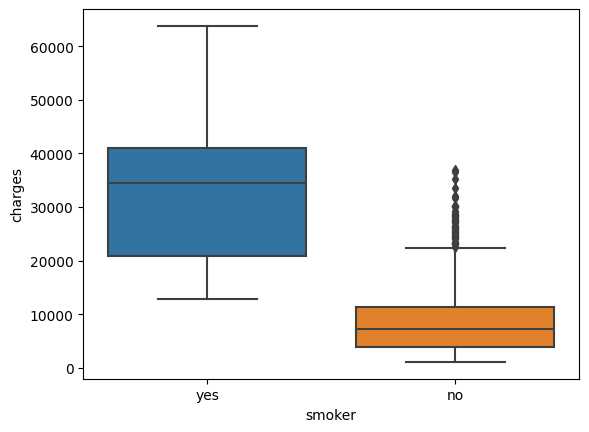

In [ ]:
# Creating a series of boxplots to show the distribution of attack across groups
sns.boxplot(x = df["smoker"], y = df["charges"])

In [ ]:
# Multi-variable Frequencies (smoker and region)
pd.crosstab(df["smoker"], df["region"], margins = True)

region,northeast,northwest,southeast,southwest,All
smoker,,,,,
no,257,267,273,267,1064
yes,67,58,91,58,274
All,324,325,364,325,1338


<Axes: xlabel='region', ylabel='charges'>

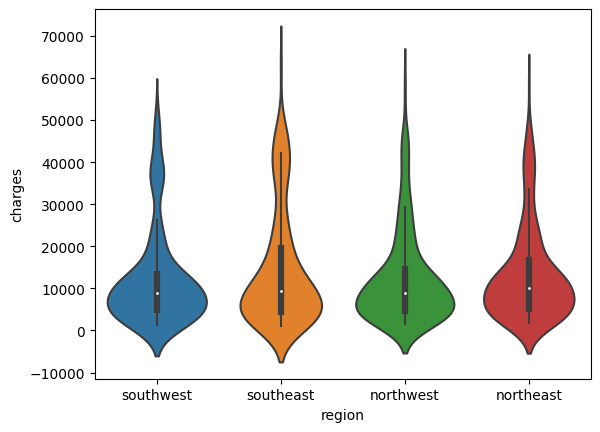

In [ ]:
# Visualization
# Create a series of violin plots to show the distribution of attack across region groups
sns.violinplot(x = df["region"], y = df["charges"])

# **VISUALIZATION**

In [ ]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Heatmap of the Correlation between the Age, BMI, Number of Children, and Charges')

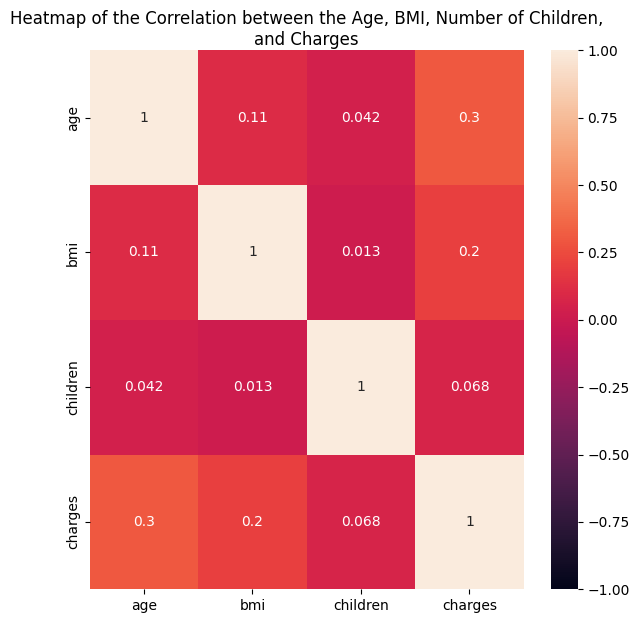

In [19]:
# Shows correlation of stats via heatmap
plt.figure(figsize=(7,7))
corr = df.corr()
sns.heatmap(corr, vmin = -1, annot = True)
plt.title('Heatmap of the Correlation between the Age, BMI, Number of \
Children, and Charges', wrap = True)

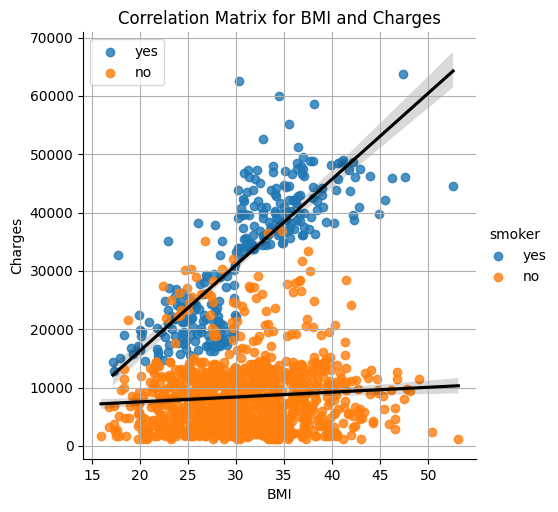

In [ ]:
g =sns.lmplot( x = "bmi", y ="charges", hue ="smoker", data = df, line_kws = {'color': 'black'})
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Correlation Matrix for BMI and Charges")
plt.legend()
plt.grid()

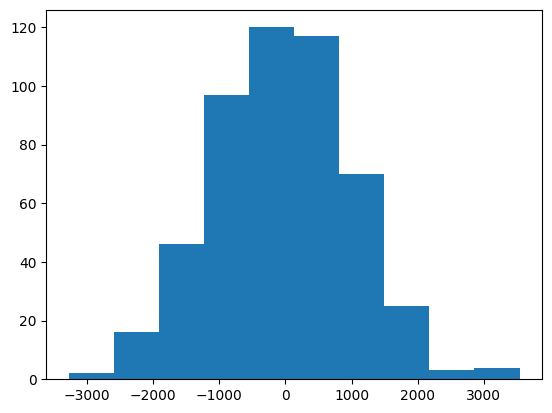

Our p-value for the sample population is: 0.99
Because our p-value is greater than 0.05, we fail to reject our null hypothesis
Null Hypothesis: On average, the charges between southwest and southeast are the same


In [ ]:
# Checking statistical difference between southeast and southwest
dfSESW = df[(df.region.isin(["southeast","southwest"]))]
dfSE = df[(df.region=="southeast")]
dfSW = df[(df.region=="southwest")]
meanSE = dfSE["charges"].mean()
meanSW = dfSW["charges"].mean()
meanDifference = meanSW - meanSE
totalCharges = dfSESW["charges"]
meanDiff = []
for i in range(500):
  setSE = []
  setSW = []
  for allCharges in totalCharges:
    random_value = np.random.random()
    if random_value > 0.528:
      setSE.append(allCharges)
    elif random_value <= 0.472:
      setSW.append(allCharges)
  meanSetSE = np.mean(setSE)
  meanSetSW = np.mean(setSW)
  setMeanDiff = meanSetSE - meanSetSW
  meanDiff.append(setMeanDiff)

plt.hist(meanDiff)
plt.show()

ind = 0
for value in meanDiff:
  if value >= meanDifference:
    ind+=1

pVal = ind/500
print("Our p-value for the sample population is:", pVal)
if pVal > 0.05:
  print("Because our p-value is greater than 0.05, we fail to reject our null hypothesis")
  print("Null Hypothesis: On average, the charges between southwest and southeast are the same")
else:
  print("Because our p-value is less than 0.05, we reject our null hypothesis, and confirm our alternative")
  print("Alternative Hypothesis: On average, the charges between southwest and southeast are NOT the same")

In [ ]:
print(dfSE.describe())
print(dfSW.describe())

              age         bmi    children       charges
count  364.000000  364.000000  364.000000    364.000000
mean    38.939560   33.355989    1.049451  14735.411438
std     14.164585    6.477648    1.177276  13971.098589
min     18.000000   19.800000    0.000000   1121.873900
25%     26.750000   28.572500    0.000000   4440.886200
50%     39.000000   33.330000    1.000000   9294.131950
75%     51.000000   37.812500    2.000000  19526.286900
max     64.000000   53.130000    5.000000  63770.428010
              age         bmi    children       charges
count  325.000000  325.000000  325.000000    325.000000
mean    39.455385   30.596615    1.141538  12346.937377
std     13.959886    5.691836    1.275952  11557.179101
min     19.000000   17.400000    0.000000   1241.565000
25%     27.000000   26.900000    0.000000   4751.070000
50%     39.000000   30.300000    1.000000   8798.593000
75%     51.000000   34.600000    2.000000  13462.520000
max     64.000000   47.600000    5.000000  52590

## Sample Setting

In [ ]:
subset1 = df.sample(frac=0.1, random_state=seedValue)
subset2 = df.sample(frac=.05, random_state=seedValue+1)
print("Sampling our data using the random seed {} for subset 1 and {} for \
subset 2.".format(seedValue, seedValue+1))
print("We created two subsets, the first has {} points, and the second {} \
points.".format(len(subset1),len(subset2)))
print("Taking a quick look at the top five points in our first subset.")
print(subset1.head(5))
print("Taking a quick look at the top five points in our second subset.")
print(subset2.head(5))

Sampling our data using the random seed 123 for subset 1 and 124 for subset 2.
We created two subsets, the first has 134 points, and the second 67 points.
Taking a quick look at the top five points in our first subset.
     age     sex     bmi  children smoker     region      charges
650   49  female  42.680         2     no  southeast   9800.88820
319   32    male  37.335         1     no  northeast   4667.60765
314   27  female  31.400         0    yes  southwest  34838.87300
150   35    male  24.130         1     no  northwest   5125.21570
336   60    male  25.740         0     no  southeast  12142.57860
Taking a quick look at the top five points in our second subset.
     age     sex     bmi  children smoker     region      charges
992   50  female  31.600         2     no  southwest  10118.42400
902   26    male  27.265         3     no  northeast   4661.28635
417   36  female  22.600         2    yes  southwest  18608.26200
48    60  female  24.530         0     no  southeast  12

## Statistical analysis

In [ ]:
# Code for stat *analysis*
medcharges1 = subset1["charges"].median()
medcharges2 = subset2["charges"].median()
print("We find that the median of our first sample set is {:,.2f}".format(medcharges1))
print("We find that the median of our second sample set is {:,.2f}".format(medcharges2))

print("We will be conducting a Mann-Whitney-U test")
print("Our null Hypothesis in this scenario is that there is no difference between the two sample sets")
print("Rejection of this hypothesis means there is likely some differences between the samples")
stat, pvalue = mannwhitneyu(subset1['charges'], subset2['charges'])
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))
if pvalue>.05:
  print('We have the same distributions. (Fail to reject H0)')
else:
  print('We have different distributions. (Reject H0')


We find that the median of our first sample set is 10,602.01
We find that the median of our second sample set is 8,442.67
We will be conducting a Mann-Whitney-U test
Our null Hypothesis in this scenario is that there is no difference between the two sample sets
Rejection of this hypothesis means there is likely some differences between the samples
Statistics=5249.500, p=0.051
We have the same distributions. (Fail to reject H0)


## Source

US Health Insurance Dataset, Anirban Datta, https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset